In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
#from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler



## **TASK 3 Clasificación de Partidas de League of Legends**

In [18]:
path = "high_diamond_ranked_10min.csv"
data = pd.read_csv(path)
data.head()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
0,4519157822,0,28,2,1,9,6,11,0,0,...,0,16567,6.8,17047,197,55,-643,8,19.7,1656.7
1,4523371949,0,12,1,0,5,5,5,0,0,...,1,17620,6.8,17438,240,52,2908,1173,24.0,1762.0
2,4521474530,0,15,0,0,7,11,4,1,1,...,0,17285,6.8,17254,203,28,1172,1033,20.3,1728.5
3,4524384067,0,43,1,0,4,5,5,1,0,...,0,16478,7.0,17961,235,47,1321,7,23.5,1647.8
4,4436033771,0,75,4,0,6,6,6,0,0,...,0,17404,7.0,18313,225,67,1004,-230,22.5,1740.4


In [19]:
# profile = ProfileReport(data)
# profile

In [20]:
conteo_clases = data['blueWins'].value_counts()
print(conteo_clases)

blueWins
0    4949
1    4930
Name: count, dtype: int64


##### Podemos obserbar que el dataset está balanceado contamos solamente con una diferencia de 19 victorias entre las victorias azules y las victorias rojas

### Data Preparation

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

In [22]:
data.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


 - **A partir de esta visualización, podemos determinar que no se necesita
   hacer encoding de las variables, ya que no hay variables categóricas.**
 - **No es necesario hacer un balanceo de datos**
 - **Se necesita realizar un escalamiento de los datos**


In [23]:

df = data.drop(['gameId', 'blueWins'], axis=1)

feature_labels = data.drop(['gameId', 'blueWins'], axis=1)
blueWins = data['blueWins']

# Escalamiento de Features
feature_labels = pd.DataFrame(StandardScaler().fit_transform(feature_labels), columns=feature_labels.columns)


feature_labels.describe()


,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,blueHeralds,blueTowersDestroyed,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,...,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03,9.879000e+03
mean,-2.876982e-17,5.034719e-18,-1.078868e-18,1.125619e-16,-1.179563e-16,-1.111234e-16,3.308530e-17,-8.702872e-17,-5.753965e-18,-2.733133e-17,...,2.589284e-17,1.146837e-15,1.444245e-15,3.394839e-16,5.897814e-16,8.055551e-17,-1.258680e-17,1.438491e-18,-1.352901e-15,-6.883180e-16
std,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,...,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000051e+00
min,-9.594869e-01,-1.298863e+00,-1.009663e+00,-2.053863e+00,-2.092146e+00,-1.634988e+00,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,...,-1.983529e-01,-3.539707e+00,-6.961495e+00,-6.254973e+00,-5.036349e+00,-4.718391e+00,-4.668380e+00,-4.364806e+00,-5.036349e+00,-3.539707e+00
25%,-4.599937e-01,-8.390689e-01,-1.009663e+00,-7.253456e-01,-7.286663e-01,-6.508123e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,...,-1.983529e-01,-7.120554e-01,-4.104749e-01,-6.276311e-01,-6.549000e-01,-7.293122e-01,-6.446966e-01,-6.486683e-01,-6.549000e-01,-7.120554e-01
50%,-3.489952e-01,8.051859e-02,9.904294e-01,-6.108705e-02,-4.692613e-02,-1.587244e-01,-8.792310e-01,-7.532257e-01,-4.811324e-01,-2.104390e-01,...,-1.983529e-01,-7.448379e-02,2.446271e-01,1.023723e-02,2.970140e-02,-3.122336e-02,1.688026e-04,-2.926826e-03,2.970140e-02,-7.448379e-02
75%,-1.269983e-01,5.403123e-01,9.904294e-01,6.031716e-01,6.348140e-01,5.794075e-01,7.195032e-01,1.327623e+00,-4.811324e-01,-2.104390e-01,...,-1.983529e-01,6.234576e-01,8.997291e-01,6.697989e-01,7.143028e-01,5.671385e-01,6.521677e-01,6.545317e-01,7.143028e-01,6.234576e-01
max,1.263783e+01,1.111557e+01,9.904294e-01,5.252982e+00,5.406995e+00,5.500287e+00,2.318237e+00,1.327623e+00,2.078430e+00,1.615907e+01,...,9.022956e+00,4.187620e+00,4.175239e+00,3.593814e+00,3.270148e+00,4.057583e+00,4.420473e+00,4.842738e+00,3.270148e+00,4.187620e+00


###  Selección de variables mediante Feature Importance

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 38 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   blueWardsPlaced               9879 non-null   float64
 1   blueWardsDestroyed            9879 non-null   float64
 2   blueFirstBlood                9879 non-null   float64
 3   blueKills                     9879 non-null   float64
 4   blueDeaths                    9879 non-null   float64
 5   blueAssists                   9879 non-null   float64
 6   blueEliteMonsters             9879 non-null   float64
 7   blueDragons                   9879 non-null   float64
 8   blueHeralds                   9879 non-null   float64
 9   blueTowersDestroyed           9879 non-null   float64
 10  blueTotalGold                 9879 non-null   float64
 11  blueAvgLevel                  9879 non-null   float64
 12  blueTotalExperience           9879 non-null   float64
 13  blu

<function matplotlib.pyplot.show(close=None, block=None)>

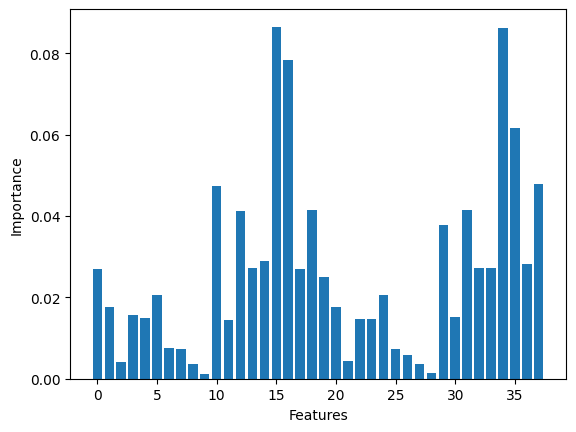

In [24]:
model = RandomForestClassifier(random_state = 1)
model.fit(feature_labels,blueWins)
# obtener las importancias 
importances = model.feature_importances_
feature_labels.info()
plt.bar(range(feature_labels.shape[1]), importances)
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show


**Debido a que podemos solamente tomar en consideración las stats del blue team, ya que son lo opuesto a las stats del read team, tomaremos las features 15 y 16: blueGoldDiff y blueExperienceDiff**

### Grafico de puntos encontrados

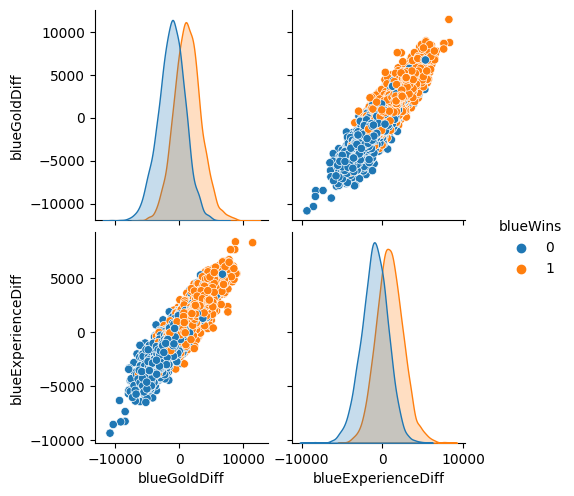

In [29]:
import seaborn as sns

# Visualizar correlación de las variables seleccionadas
sns.pairplot(data[[
                'blueGoldDiff',
                'blueExperienceDiff',
                'blueWins']], hue='blueWins')
plt.show()

Los gráficos sugieren que una mayor ventaja en oro y experiencia para el equipo azul podría estar correlacionada con una mayor probabilidad de ganar el juego.

### **Task 3.2 - Support Vector Machines: Clasificación de Partidas de League of Legends**

### Split de datos

In [51]:
from sklearn.model_selection import train_test_split

# Seleccionar solamente 2 variables para x
feature_labels = feature_labels[['blueGoldDiff', 'blueExperienceDiff']]
feature_labels

# Split the dataset a  training, validation, y test sets
X_train, X_temp, y_train, y_temp = train_test_split(feature_labels, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

# Print de shapes 
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)


Training set shape: (7903, 2)
Validation set shape: (988, 2)
Test set shape: (988, 2)


### **SVM desde cero**

Precisión del modelo:  0.7348178137651822


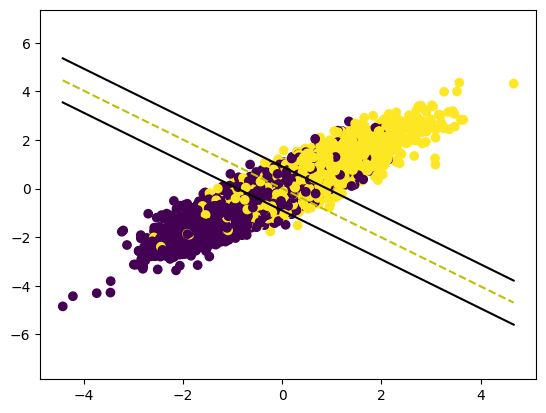

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score


class SVM:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    def fit(self, X,y):
            _, n_features = X.shape
            y_ = np.where(y <= 0, -1, 1)
            self.w = np.zeros(n_features)
            self.b = 0
            fn = 0
            for feature in X:
                for idx, x_i in enumerate(X[feature]):
                    condition_factor = y_[idx] * (x_i * self.w[fn] - self.b)
                    condition = condition_factor >= 1
                    if condition:
                        self.w -= self.lr * (2 * self.lambda_param * self.w[fn])
                    else:
                        self.w[fn] -= self.lr * (2 * self.lambda_param * self.w[fn] - np.dot(x_i, y_[idx]))
                        self.b -= self.lr * y_[idx] 
                fn += 1

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test.values)
y_true = np.where(y_test.values <= 0, -1, 1)

def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

print("Precisión del modelo: ", accuracy(y_true, predictions))


def visualize_svm():
    def get_hyperplane_value(x, w, b, offset):
        return (-w[0] * x + b + offset) / w[1]

    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    plt.scatter(X_train.values[:, 0], X_train.values[:, 1], marker="o", c=y_train)

    x0_1 = np.amin(X_train.values[:, 0])
    x0_2 = np.amax(X_train.values[:, 0])

    x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
    x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

    x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
    x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

    x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
    x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

    ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
    ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
    ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

    x1_min = np.amin(X_train.values[:, 1])
    x1_max = np.amax(X_train.values[:, 1])
    ax.set_ylim([x1_min - 3, x1_max + 3])

    plt.show()

visualize_svm()

### **SVM con librerías**

In [54]:
from sklearn import svm
from sklearn.metrics import precision_score

model = svm.SVC(kernel='rbf', class_weight={-1:1, 1:10})
y_training = np.where(y_train.values <= 0, -1, 1)
model.fit(X_train.values, y_training)

y_pred = model.predict(X_test.values)
y_true = np.where(y_test.values <= 0, -1, 1)
L_precision = precision_score(y_true, y_pred, average='weighted')

print("Precisión del modelo: " + str(L_precision))

Precisión del modelo: 0.7258098954867387


### Elección de métrica de desempeño

#### **Métrica:** Precisión

Se decidió tomar la métrica Presicion, ya que se centra en el costo de los falsos positivos, ya que predecir una victoria cuando en realidad es una derrota, suele tener un mayor costo. Por lo que la precisión se centraría en minimizar esos costosos falsos positivos. Por otro lado, se tiene un enfoque en la Clase Positiva. El objetivo del modelo es identificar con alta confiabilidad cuando el equipo azul va a ganar, por lo que se busca una alta precisión para la clase de victorias.


### Tunning variable

Se realizó tunning a learning_rate y lambda_param. El hiperparámetro lambda_param es especialmente importante porque actúa como un término de regularización que puede ayudar a prevenir el overfitting. Un valor alto puede hacer que el modelo sea demasiado simple, mientras que un valor muy bajo podría llevar a overfitting. 

In [28]:
# Rango de valores para lambda_param que deseas probar
lambda_params = [0.001, 0.01, 0.1, 1, 10]

# el mejor valor de precisión y el mejor modelo
best_precision = 0
best_lambda = None
best_model = None

# Probar diferentes valores de lambda_param
for lambda_param in lambda_params:
    clf = SVM(learning_rate=0.001, lambda_param=lambda_param, n_iters=1000)
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test.values)
    y_true = np.where(y_test.values <= 0, -1, 1)
    current_precision = accuracy(y_true, predictions)
    print(f"Lambda: {lambda_param}, Precisión del modelo: {current_precision}")
    
    if current_precision > best_precision:
        best_precision = current_precision
        best_lambda = lambda_param
        best_model = clf

# Imprimir el mejor valor de lambda_param y su precisión
print(f"Mejor lambda_param: {best_lambda}, Mejor precisión: {best_precision}")


Lambda: 0.001, Precisión del modelo: 0.7358299595141701
Lambda: 0.01, Precisión del modelo: 0.7348178137651822
Lambda: 0.1, Precisión del modelo: 0.7307692307692307
Lambda: 1, Precisión del modelo: 0.7267206477732794
Lambda: 10, Precisión del modelo: 0.7064777327935222
Mejor lambda_param: 0.001, Mejor precisión: 0.7358299595141701


#### **¿Cuál implementación fue mejor?**



El modelo sin librerías tuvo una puntuación mayor en la prueba de precisión. Esto puede que se deba a que durante la implementación se hizo selección de los hiper parámetros, además del tunning para el refinamiento de los mismos.

### **Task 3.2 - Árboles de Decisión: Clasificación de Partidas de League of Legends**

### **Árbol con librerías**

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df, blueWins, train_size=0.8, random_state=1)

In [43]:
from sklearn.tree import DecisionTreeClassifier

arbol = DecisionTreeClassifier()
#entrenamiento
arbol_victorias = arbol.fit(X_train, Y_train)


In [41]:
# from sklearn import tree

# fig = plt.figure(figsize=(25,20))
# tree.plot_tree(arbol_victorias, feature_names=list(df.columns.values), class_names=list("blueWins"), filled=True)
# plt.show()
# fig.savefig("ArbolConLibreria.png")

In [44]:
predic = arbol_victorias.predict(X_test)
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(Y_test, predic)
print(f'Accuracy: {accuracy}')

classification_rep = classification_report(Y_test, predic)
print(f'Classification Report:\n{classification_rep}')

importances = arbol_victorias.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': df.columns, 'Importance': importances})
top_features = feature_importance_df.sort_values(by='Importance', ascending=False).head(5)

print('Top 5 Features más importantes:')
print(top_features)


Accuracy: 0.6467611336032388
Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.64      0.65      1002
           1       0.64      0.66      0.65       974

    accuracy                           0.65      1976
   macro avg       0.65      0.65      0.65      1976
weighted avg       0.65      0.65      0.65      1976

Top 5 Features más importantes:
               Feature  Importance
35         redGoldDiff    0.237963
16        blueGoldDiff    0.086541
0               gameId    0.048640
32  redTotalExperience    0.037391
1      blueWardsPlaced    0.034073


### **Árbol sin librerías**

In [61]:
import numpy as np
from sklearn.model_selection import train_test_split

feature_labels = feature_labels[['blueGoldDiff', 'blueExperienceDiff']]

# Split
X_train, X_temp, y_train, y_temp = train_test_split(feature_labels, blueWins, test_size=0.2, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=1)

class DecisionTree:

    def __init__(self, max_depth=None):
        self.max_depth = max_depth
        self.tree = None

    def fit(self, X, y, depth=0):
        num_samples, num_features = X.shape
        unique_classes = np.unique(y)

        # Base case
        if len(unique_classes) == 1 or (self.max_depth is not None and depth == self.max_depth):
            return {'class': unique_classes[0]}

        # Find division
        best_split = self.find_best_split(X, y)

        if best_split is None:
            return {'class': np.argmax(np.bincount(y))}  # Nodo hoja, mayoría de la clase

        feature_index, threshold = best_split
        left_indices = X[:, feature_index] <= threshold
        right_indices = ~left_indices

        left_subtree = self.fit(X[left_indices], y[left_indices], depth + 1)
        right_subtree = self.fit(X[right_indices], y[right_indices], depth + 1)

        return {'feature_index': feature_index, 'threshold': threshold,
                'left': left_subtree, 'right': right_subtree}

    def find_best_split(self, X, y):
        num_samples, num_features = X.shape
        if num_samples <= 1:
            return None

        # Gini for actual node
        current_gini = self.gini(y)

        best_gini = float('inf')
        best_split = None

        for feature_index in range(num_features):
            feature_values = np.unique(X[:, feature_index])
            for threshold in feature_values:
                left_indices = X[:, feature_index] <= threshold
                right_indices = ~left_indices

                if np.sum(left_indices) > 0 and np.sum(right_indices) > 0:
                    left_gini = self.gini(y[left_indices])
                    right_gini = self.gini(y[right_indices])

                    weighted_gini = (np.sum(left_indices) * left_gini + np.sum(right_indices) * right_gini) / num_samples

                    if weighted_gini < best_gini:
                        best_gini = weighted_gini
                        best_split = (feature_index, threshold)

        return best_split

    def gini(self, y):
        classes, counts = np.unique(y, return_counts=True)
        probabilities = counts / len(y)
        gini = 1 - np.sum(probabilities**2)
        return gini

    def predict_sample(self, x, tree):
        if 'class' in tree:
            return tree['class']
        else:
            feature_value = x[tree['feature_index']]
            if feature_value <= tree['threshold']:
                return self.predict_sample(x, tree['left'])
            else:
                return self.predict_sample(x, tree['right'])

    def predict(self, X):
        return np.array([self.predict_sample(x, self.tree) for x in X])

# Training
tree_model = DecisionTree(max_depth=5)
tree_model.tree = tree_model.fit(X_train.to_numpy(), y_train)

# Predictions
predictions_tree = tree_model.predict(X_test.to_numpy())

# Accuracy
accuracy_tree = np.sum(predictions_tree == y_test) / len(y_test)
print("Precisión del modelo sin librerías: ", accuracy_tree)

Precisión del modelo sin librerías:  0.5121457489878543
